<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [17]:
from collections import deque
def dfs(G, origen, destino): 
    expanded = 0
    visited = []
    
    stack = deque([origen])
    parent = {origen: None}
    actualNode = origen
    while (actualNode!=destino and stack != deque([])):
        actualNode = stack.popleft()
        visited.append(actualNode)
        ln = list(set(G.neighbors(actualNode))-set(visited))
        for node in ln:
            stack.appendleft(node)
            parent[node]= actualNode
        expanded +=1
    print(visited)
    actualNode= destino
    path = []
    if stack == deque([]):
        return ('No existeix camí')
    while actualNode!=origen:
        path.append(actualNode)
        actualNode = parent[actualNode]
    path.append(actualNode)
    path.reverse()
    return {
        'path' : path,
        'expanded' : expanded
    }

In [18]:
import networkx as nx
G = nx.generators.barabasi_albert_graph(100, 2)
dfs(G, 1, 95)

[1, 30, 5, 66, 3, 29, 13, 94, 2, 98, 36, 93, 54, 39, 87, 73, 24, 31, 16, 51, 7, 63, 26, 46, 8, 91, 50, 83, 72, 21, 10, 59, 79, 86, 28, 77, 74, 15, 88, 9, 55, 64, 34, 69, 4, 62, 17, 27, 65, 6, 99, 58, 78, 61, 18, 22, 60, 84, 42, 71, 0, 92, 89, 14, 76, 44, 85, 41, 97, 70, 33, 35, 40, 23, 11, 48, 12, 75, 68, 96, 18, 25, 37, 45, 90, 0, 89, 23, 85, 52, 20, 18, 49, 47, 40, 6, 68, 37, 0, 14, 19, 43, 0, 76, 43, 11, 41, 4, 67, 0, 20, 52, 47, 41, 33, 0, 32, 4, 0, 25, 56, 21, 53, 38, 50, 6, 33, 0, 20, 81, 11, 75, 0, 71, 6, 67, 16, 21, 20, 55, 6, 4, 10, 95]


{'path': [1, 30, 5, 66, 3, 29, 13, 94, 2, 95], 'expanded': 144}

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

In [1]:
def cnx(G):
    nodeList = list(G.nodes)
    listaListas =[]
    while (nodeList!=[]):
        actualNode = nodeList[0]
        listaNodos1 = dfs1(G,actualNode)
        listaListas.append(listaNodos1)
        nodeList = list(set(nodeList)-set(listaNodos1))
    return listaListas
        

In [2]:
from collections import deque
#Utilizas el dfs, que devolverá una lista con todos los nodos conexos a partir de un nodo
def dfs1(G, origen): 
    visited = []
    finalList = []
    stack = deque([origen])
    actualNode = origen
    while (stack != deque([])):
        actualNode = stack.popleft()
        visited.append(actualNode)
        ln = list(set(G.neighbors(actualNode))-set(visited))
        for node in ln:
            stack.appendleft(node)
    for node in visited: 
        if not node in finalList:
            finalList.append(node)
    return finalList
         

[[0, 5, 4, 3, 2, 1],
 [6, 7, 10, 9, 8],
 [11, 17, 20, 19, 15, 14, 13, 18, 12, 16],
 [21, 27, 26, 23, 22, 25, 24]]

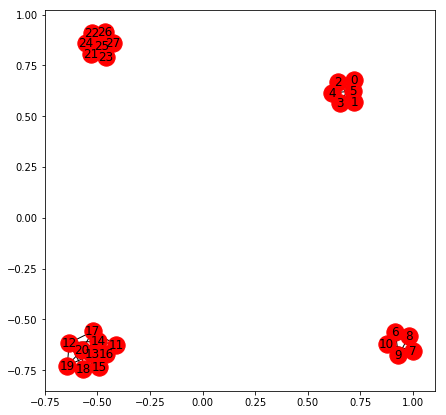

In [5]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=3)
draw(G)
cnx(G)